In [1]:
pwd

'C:\\Users\\Mahi\\AppData\\Local\\Programs\\Python\\Python39\\Scripts\\ETL Project'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df1 = pd.read_csv('User_activity.txt')

In [4]:
df1.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,22438,22439,22440,22441,22442,22443,22444,22445,22446,22447
0,device_id,B-52-23845,B-52-16587,B-52-36461,B-52-29089,B-52-14212,B-52-30970,B-52-15903,B-52-12407,B-52-22743,...,B-52-16131,B-52-50027,B-52-23845,B-52-16587,B-52-36461,B-52-29089,B-52-13395,B-52-8702,B-52-50977,B-52-48431
1,app_name,Snapchat (Mobile App),Pinterest (Mobile App),Facebook (Mobile App),Yahoo Mail (Mobile App),Netflix (Mobile App),Instagram (Mobile App),Yahoo Newsroom (Mobile App),Google Search (Mobile App),YouTube (Mobile App),...,Google Search (Mobile App),Facebook Messenger (Mobile App),Snapchat (Mobile App),Pinterest (Mobile App),Facebook (Mobile App),Yahoo Mail (Mobile App),Netflix (Mobile App),GroupMe (Mobile App),Instagram (Mobile App),YouTube (Mobile App)
2,minutes,27.9342,14.6664,439.7652,900.6606,17.3502,16.065,42.6006,90.1152,NaN,...,1.89,464.8644,27.9342,14.6664,439.7652,900.6606,1.1340000000000001,343.5264,0.9072,994.6692


In [5]:
df1 = df1.T

In [6]:
df1.head()

,0,1,2
Unnamed: 0,device_id,app_name,minutes
0,B-52-23845,Snapchat (Mobile App),27.9342
1,B-52-16587,Pinterest (Mobile App),14.6664
2,B-52-36461,Facebook (Mobile App),439.7652
3,B-52-29089,Yahoo Mail (Mobile App),900.6606


In [7]:
df1.reset_index(drop=True, inplace=True)

In [8]:
df1 = df1.rename(columns = df1.iloc[0])

In [9]:
df1.head()

,device_id,app_name,minutes
0,device_id,app_name,minutes
1,B-52-23845,Snapchat (Mobile App),27.9342
2,B-52-16587,Pinterest (Mobile App),14.6664
3,B-52-36461,Facebook (Mobile App),439.7652
4,B-52-29089,Yahoo Mail (Mobile App),900.6606


In [10]:
df1 = df1.drop([0], axis = 0)

In [11]:
df1.duplicated()

1        False
2        False
3        False
4        False
5        False
         ...  
22444     True
22445     True
22446     True
22447     True
22448     True
Length: 22448, dtype: bool

In [12]:
df1.drop_duplicates()

,device_id,app_name,minutes
1,B-52-23845,Snapchat (Mobile App),27.9342
2,B-52-16587,Pinterest (Mobile App),14.6664
3,B-52-36461,Facebook (Mobile App),439.7652
4,B-52-29089,Yahoo Mail (Mobile App),900.6606
5,B-52-14212,Netflix (Mobile App),17.3502
...,...,...,...
22436,B-52-12331,Pinterest (Mobile App),88.5276
22437,B-52-33231,Facebook Messenger (Mobile App),199.3194
22438,B-52-46037,Outlook (Mobile App),52.5042
22439,B-52-16131,Google Search (Mobile App),1.89


In [13]:
df2 = pd.read_csv('device_demographics.csv')

In [14]:
df2.head()

,device_id,gender_id
0,B-52-23845,2.0
1,B-52-16587,1.0
2,B-52-36461,2.0
3,B-52-29089,2.0
4,B-52-14212,2.0


In [15]:
df2.shape

(2774, 2)

In [16]:
df3 = pd.read_csv('publishers.csv')

In [17]:
df3.head()

,app_name,Publisher
0,Walmart (Mobile App),Wal-Mart
1,Microsoft Word (Mobile App),Microsoft Sites
2,Sam's Club Scan & Go (Mobile App),Wal-Mart
3,Pinterest (Mobile App),Pinterest
4,YouTube (Mobile App),Google Sites


In [18]:
df3.shape

(23, 2)

In [19]:
df4 = pd.merge(df1, df2, on = 'device_id', how = 'left')
df4

,device_id,app_name,minutes,gender_id
0,B-52-23845,Snapchat (Mobile App),27.9342,2.0
1,B-52-16587,Pinterest (Mobile App),14.6664,1.0
2,B-52-36461,Facebook (Mobile App),439.7652,2.0
3,B-52-29089,Yahoo Mail (Mobile App),900.6606,2.0
4,B-52-14212,Netflix (Mobile App),17.3502,2.0
...,...,...,...,...
22443,B-52-29089,Yahoo Mail (Mobile App),900.6606,2.0
22444,B-52-13395,Netflix (Mobile App),1.1340000000000001,1.0
22445,B-52-8702,GroupMe (Mobile App),343.5264,2.0
22446,B-52-50977,Instagram (Mobile App),0.9072,1.0


In [20]:
df5 = pd.merge(df3, df4, on = 'app_name', how = 'left')
df5.sort_index()
df5

,app_name,Publisher,device_id,minutes,gender_id
0,Walmart (Mobile App),Wal-Mart,B-52-29735,0.1512,1.0
1,Walmart (Mobile App),Wal-Mart,B-52-8398,NaN,1.0
2,Walmart (Mobile App),Wal-Mart,B-52-26391,32.6592,NaN
3,Walmart (Mobile App),Wal-Mart,B-52-14592,51.7482,2.0
4,Walmart (Mobile App),Wal-Mart,B-52-4902,24.6078,1.0
...,...,...,...,...,...
23410,Microsoft Word (Mobile App),Microsoft Sites,B-52-49742,6.7662,2.0
23411,Microsoft Word (Mobile App),Microsoft Sites,B-52-8474,0.2646,1.0
23412,Microsoft Word (Mobile App),Microsoft Sites,B-52-38285,2.7594,2.0
23413,Microsoft Word (Mobile App),Microsoft Sites,B-52-30571,24.4188,2.0


In [21]:
df6 = df5[['device_id', 'gender_id', 'app_name', 'minutes', 'Publisher']]
df6.sort_values(by=['app_name', 'minutes'],inplace=True)
df6.reset_index(drop=True,inplace=True)
trans1 = df6

In [22]:
trans1

,device_id,gender_id,app_name,minutes,Publisher
0,B-52-52155,2.0,Amazon Mobile (Mobile App),0.0378,Amazon Sites
1,B-52-9082,2.0,Amazon Mobile (Mobile App),0.0756,Amazon Sites
2,B-52-20729,1.0,Amazon Mobile (Mobile App),0.0756,Amazon Sites
3,B-52-38817,2.0,Amazon Mobile (Mobile App),0.0756,Amazon Sites
4,B-52-49381,2.0,Amazon Mobile (Mobile App),0.1134,Amazon Sites
...,...,...,...,...,...
23410,B-52-24301,2.0,YouTube (Mobile App),NaN,Google Sites
23411,B-52-15105,1.0,YouTube (Mobile App),NaN,Google Sites
23412,B-52-7505,2.0,YouTube (Mobile App),NaN,Google Sites
23413,B-52-41743,1.0,YouTube (Mobile App),NaN,Google Sites


In [23]:
df7 = df6.groupby(['app_name', 'Publisher'])['gender_id'].agg(pd.Series.mode)
df7 = pd.DataFrame(df7)
df7

,,gender_id
app_name,Publisher,
Amazon Mobile (Mobile App),Amazon Sites,2.0
Amazon Music with Prime Music (Mobile App),Amazon Sites,2.0
Facebook (Mobile App),Facebook,2.0
Facebook Messenger (Mobile App),Facebook,2.0
Google Play (Mobile App),Google Sites,2.0
Google Search (Mobile App),Google Sites,2.0
GroupMe (Mobile App),Microsoft Sites,2.0
Instagram (Mobile App),Facebook,2.0
Kindle (Mobile App),Amazon Sites,2.0


In [24]:
trans2 = df7
trans2

,,gender_id
app_name,Publisher,
Amazon Mobile (Mobile App),Amazon Sites,2.0
Amazon Music with Prime Music (Mobile App),Amazon Sites,2.0
Facebook (Mobile App),Facebook,2.0
Facebook Messenger (Mobile App),Facebook,2.0
Google Play (Mobile App),Google Sites,2.0
Google Search (Mobile App),Google Sites,2.0
GroupMe (Mobile App),Microsoft Sites,2.0
Instagram (Mobile App),Facebook,2.0
Kindle (Mobile App),Amazon Sites,2.0


In [25]:
dfl1 = pd.merge(df6, df7, on = ['app_name', 'Publisher'], how = 'left')
dfl1

,device_id,gender_id_x,app_name,minutes,Publisher,gender_id_y
0,B-52-52155,2.0,Amazon Mobile (Mobile App),0.0378,Amazon Sites,2.0
1,B-52-9082,2.0,Amazon Mobile (Mobile App),0.0756,Amazon Sites,2.0
2,B-52-20729,1.0,Amazon Mobile (Mobile App),0.0756,Amazon Sites,2.0
3,B-52-38817,2.0,Amazon Mobile (Mobile App),0.0756,Amazon Sites,2.0
4,B-52-49381,2.0,Amazon Mobile (Mobile App),0.1134,Amazon Sites,2.0
...,...,...,...,...,...,...
23410,B-52-24301,2.0,YouTube (Mobile App),NaN,Google Sites,2.0
23411,B-52-15105,1.0,YouTube (Mobile App),NaN,Google Sites,2.0
23412,B-52-7505,2.0,YouTube (Mobile App),NaN,Google Sites,2.0
23413,B-52-41743,1.0,YouTube (Mobile App),NaN,Google Sites,2.0


In [26]:
gender_id_dummy = dfl1.apply(lambda x: x['gender_id_y'] if pd.isnull(x['gender_id_x']) else x['gender_id_x'], axis=1)
df6['gender_id'] = gender_id_dummy
df6

,device_id,gender_id,app_name,minutes,Publisher
0,B-52-52155,2.0,Amazon Mobile (Mobile App),0.0378,Amazon Sites
1,B-52-9082,2.0,Amazon Mobile (Mobile App),0.0756,Amazon Sites
2,B-52-20729,1.0,Amazon Mobile (Mobile App),0.0756,Amazon Sites
3,B-52-38817,2.0,Amazon Mobile (Mobile App),0.0756,Amazon Sites
4,B-52-49381,2.0,Amazon Mobile (Mobile App),0.1134,Amazon Sites
...,...,...,...,...,...
23410,B-52-24301,2.0,YouTube (Mobile App),NaN,Google Sites
23411,B-52-15105,1.0,YouTube (Mobile App),NaN,Google Sites
23412,B-52-7505,2.0,YouTube (Mobile App),NaN,Google Sites
23413,B-52-41743,1.0,YouTube (Mobile App),NaN,Google Sites


In [27]:
df8 = df6.groupby(['app_name', 'Publisher'])['minutes'].agg(pd.Series.median)
df8 = pd.DataFrame(df8)
df8

,,minutes
app_name,Publisher,
Amazon Mobile (Mobile App),Amazon Sites,47.1555
Amazon Music with Prime Music (Mobile App),Amazon Sites,34.3980
Facebook (Mobile App),Facebook,2764.5408
Facebook Messenger (Mobile App),Facebook,1349.6490
Google Play (Mobile App),Google Sites,57.6639
Google Search (Mobile App),Google Sites,119.8638
GroupMe (Mobile App),Microsoft Sites,64.8270
Instagram (Mobile App),Facebook,246.2481
Kindle (Mobile App),Amazon Sites,25.4394


In [28]:
trans3 = df8

In [29]:
dfl2 = pd.merge(df6, df8, on = ['app_name', 'Publisher'], how = 'left')
dfl2

,device_id,gender_id,app_name,minutes_x,Publisher,minutes_y
0,B-52-52155,2.0,Amazon Mobile (Mobile App),0.0378,Amazon Sites,47.1555
1,B-52-9082,2.0,Amazon Mobile (Mobile App),0.0756,Amazon Sites,47.1555
2,B-52-20729,1.0,Amazon Mobile (Mobile App),0.0756,Amazon Sites,47.1555
3,B-52-38817,2.0,Amazon Mobile (Mobile App),0.0756,Amazon Sites,47.1555
4,B-52-49381,2.0,Amazon Mobile (Mobile App),0.1134,Amazon Sites,47.1555
...,...,...,...,...,...,...
23410,B-52-24301,2.0,YouTube (Mobile App),NaN,Google Sites,210.4326
23411,B-52-15105,1.0,YouTube (Mobile App),NaN,Google Sites,210.4326
23412,B-52-7505,2.0,YouTube (Mobile App),NaN,Google Sites,210.4326
23413,B-52-41743,1.0,YouTube (Mobile App),NaN,Google Sites,210.4326


In [30]:
minutes_dummy = dfl2.apply(lambda x: x['minutes_y'] if pd.isnull(x['minutes_x']) else x['minutes_x'], axis=1)
df6['minutes'] = minutes_dummy

In [31]:
df6

,device_id,gender_id,app_name,minutes,Publisher
0,B-52-52155,2.0,Amazon Mobile (Mobile App),0.0378,Amazon Sites
1,B-52-9082,2.0,Amazon Mobile (Mobile App),0.0756,Amazon Sites
2,B-52-20729,1.0,Amazon Mobile (Mobile App),0.0756,Amazon Sites
3,B-52-38817,2.0,Amazon Mobile (Mobile App),0.0756,Amazon Sites
4,B-52-49381,2.0,Amazon Mobile (Mobile App),0.1134,Amazon Sites
...,...,...,...,...,...
23410,B-52-24301,2.0,YouTube (Mobile App),210.4326,Google Sites
23411,B-52-15105,1.0,YouTube (Mobile App),210.4326,Google Sites
23412,B-52-7505,2.0,YouTube (Mobile App),210.4326,Google Sites
23413,B-52-41743,1.0,YouTube (Mobile App),210.4326,Google Sites


In [32]:
df6.isnull().sum()

device_id    0
gender_id    0
app_name     0
minutes      0
Publisher    0
dtype: int64

In [33]:
df6 = df6.astype({'minutes':'float64'})

In [34]:
trans4 = df6.groupby(['app_name']).agg({'minutes': ('median', 'std') })
trans4

minutes             
                                               median          std
app_name                                                          
Amazon Mobile (Mobile App)                    47.1555   311.223196
Amazon Music with Prime Music (Mobile App)    34.3980   449.620841
Facebook (Mobile App)                       2764.5408  3247.978190
Facebook Messenger (Mobile App)             1349.6490  3039.701650
Google Play (Mobile App)                      57.6639   548.827380
Google Search (Mobile App)                   119.8638  1910.343859
GroupMe (Mobile App)                          64.8270   275.667510
Instagram (Mobile App)                       246.2481  1480.522187
Kindle (Mobile App)                           25.4394  1623.650743
Microsoft Word (Mobile App)                   11.6046    93.285995
Netflix (Mobile App)                          78.7374  2320.980361
Outlook (Mobile App)                         103.2696   523.415758
Pinterest (Mobile App)                       103.4397   622.723160
Sam's Club (Mobile App)                        8.7129    56.544245
Sam's Club Scan & Go (Mobile App)              3.3264    64.633239
Snapchat (Mobile App)                        208.5426  1042.890432
Tumblr (Mobile App)                          231.2982  2049.686099
Walmart (Mobile App)                          31.1283   128.122874
Yahoo Mail (Mobile App)                      169.5330   563.998557
Yahoo Newsroom (Mobile App)                   33.0750   443.097277
YouTube (Mobile App)                         210.4326  2294.414126

In [35]:
trans4 = trans4.droplevel(0,axis=1)

In [36]:
trans4['thres'] = trans4['median'] + trans4['std']

In [37]:
trans4

,median,std,thres
app_name,,,
Amazon Mobile (Mobile App),47.1555,311.223196,358.378696
Amazon Music with Prime Music (Mobile App),34.3980,449.620841,484.018841
Facebook (Mobile App),2764.5408,3247.978190,6012.518990
Facebook Messenger (Mobile App),1349.6490,3039.701650,4389.350650
Google Play (Mobile App),57.6639,548.827380,606.491280
Google Search (Mobile App),119.8638,1910.343859,2030.207659
GroupMe (Mobile App),64.8270,275.667510,340.494510
Instagram (Mobile App),246.2481,1480.522187,1726.770287
Kindle (Mobile App),25.4394,1623.650743,1649.090143


In [38]:
trans4.loc['Amazon Mobile (Mobile App)','thres']

358.37869617823327

In [39]:
filter1 = df6.apply((lambda row: True if (row['minutes'] <= trans4.loc[row['app_name'],'thres'] and row['minutes'] > 30) else False),axis=1)

In [40]:
df9 = df6[filter1]
df9

,device_id,gender_id,app_name,minutes,Publisher
155,B-52-36955,1.0,Amazon Mobile (Mobile App),100.3590,Amazon Sites
156,B-52-32471,2.0,Amazon Mobile (Mobile App),101.3418,Amazon Sites
157,B-52-10545,2.0,Amazon Mobile (Mobile App),101.5308,Amazon Sites
158,B-52-9595,2.0,Amazon Mobile (Mobile App),101.6064,Amazon Sites
159,B-52-21546,2.0,Amazon Mobile (Mobile App),101.7198,Amazon Sites
...,...,...,...,...,...
23410,B-52-24301,2.0,YouTube (Mobile App),210.4326,Google Sites
23411,B-52-15105,1.0,YouTube (Mobile App),210.4326,Google Sites
23412,B-52-7505,2.0,YouTube (Mobile App),210.4326,Google Sites
23413,B-52-41743,1.0,YouTube (Mobile App),210.4326,Google Sites


In [41]:
def Quartile1(x):
    return np.percentile(x,25)
def Quartile3(x):
    return np.percentile(x,75)

In [42]:
df10 = df9.groupby('app_name')['minutes'].agg({'count', 'mean', 'min', 'max', 'median', 'std',Quartile1, Quartile3})
df10 = df10[['count', 'min', 'mean', 'Quartile1', 'median', 'Quartile3', 'std', 'max']]
df10

,count,min,mean,Quartile1,median,Quartile3,std,max
app_name,,,,,,,,
Amazon Mobile (Mobile App),828,30.0888,119.505818,49.28175,86.5809,167.35950,84.114884,357.8526
Amazon Music with Prime Music (Mobile App),126,32.2812,147.709200,53.97840,98.0343,210.82950,122.798296,477.7164
Facebook (Mobile App),1911,30.6180,2420.186242,925.85430,2307.0474,3679.31970,1683.862894,5995.2312
Facebook Messenger (Mobile App),1912,30.6180,1396.553956,428.68980,1172.6883,2101.08465,1138.905491,4386.3120
Google Play (Mobile App),1844,30.0132,127.655345,53.51535,86.2407,162.72900,109.966016,601.7382
Google Search (Mobile App),1747,30.0132,345.808226,106.27470,219.7314,432.52650,365.273923,1990.3968
GroupMe (Mobile App),92,30.5424,131.117517,57.68280,102.9672,190.40805,86.111981,329.9940
Instagram (Mobile App),1092,30.0132,465.308740,111.48165,252.4473,728.84070,447.590487,1724.3226
Kindle (Mobile App),129,30.9204,344.901265,51.25680,168.3990,482.89500,397.408270,1641.2382


In [43]:
df11 = df9.groupby(['app_name','gender_id'])['minutes'].agg({'count', 'mean', 'min', 'max', 'median', 'std'})
df11 = df11[['count', 'min', 'mean','median', 'std', 'max']]
df11

count      min  \
app_name                                   gender_id                   
Amazon Mobile (Mobile App)                 1.0          304  30.2022   
                                           2.0          524  30.0888   
Amazon Music with Prime Music (Mobile App) 1.0           37  33.2262   
                                           2.0           89  32.2812   
Facebook (Mobile App)                      1.0          718  34.9272   
                                           2.0         1193  30.6180   
Facebook Messenger (Mobile App)            1.0          683  30.6180   
                                           2.0         1229  30.6936   
Google Play (Mobile App)                   1.0          682  30.0132   
                                           2.0         1162  30.0132   
Google Search (Mobile App)                 1.0          637  30.0510   
                                           2.0         1110  30.0132   
GroupMe (Mobile App)                       1.0           26  34.6248   
                                           2.0           66  30.5424   
Instagram (Mobile App)                     1.0          395  30.0132   
                                           2.0          697  30.0132   
Kindle (Mobile App)                        1.0           54  30.9204   
                                           2.0           75  31.1094   
Microsoft Word (Mobile App)                1.0           18  30.6558   
                                           2.0           54  31.7142   
Netflix (Mobile App)                       1.0          161  32.3568   
                                           2.0          272  30.4290   
Outlook (Mobile App)                       1.0           64  36.4392   
                                           2.0          147  30.1266   
Pinterest (Mobile App)                     1.0          162  30.3156   
                                           2.0          371  30.3912   
Sam's Club (Mobile App)                    1.0            1  58.0986   
                                           2.0            1  42.0714   
Sam's Club Scan & Go (Mobile App)          1.0            3  36.7038   
                                           2.0            4  33.6420   
Snapchat (Mobile App)                      1.0          287  30.4668   
                                           2.0          536  30.1266   
Tumblr (Mobile App)                        1.0           60  31.6386   
                                           2.0           90  30.3156   
Walmart (Mobile App)                       1.0          186  30.8070   
                                           2.0          416  30.0510   
Yahoo Mail (Mobile App)                    1.0          144  30.4290   
                                           2.0          252  30.5046   
Yahoo Newsroom (Mobile App)                1.0           12  33.0750   
                                           2.0           33  30.0888   
YouTube (Mobile App)                       1.0          652  30.4290   
                                           2.0         1103  30.0888   

                                                             mean     median  \
app_name                                   gender_id                           
Amazon Mobile (Mobile App)                 1.0         121.036843    92.9880   
                                           2.0         118.617590    84.9744   
Amazon Music with Prime Music (Mobile App) 1.0         158.794735   110.0358   
                                           2.0         143.100607    95.8986   
Facebook (Mobile App)                      1.0        2453.185938  2327.5539   
                                           2.0        2400.325570  2291.3226   
Facebook Messenger (Mobile App)            1.0        1415.977927  1185.8238   
                                           2.0        1385.759349  1170.3636   
Google Play (Mobile App)                   1.0         128.698192    85.6359   
     

In [44]:
df10.to_csv('statisticaldata1.csv')

In [45]:
df11.to_csv('statisticaldata2.csv')

In [46]:
df12 = pd.DataFrame()

In [47]:
df12['app_name'] = df9.groupby('app_name')['device_id'].count().index

In [48]:
df12['total minutes'] = df9.groupby('app_name')['minutes'].sum()

In [49]:
s2 = df9.groupby('app_name')['minutes'].sum()
s1= pd.Series(df9.groupby('app_name')['device_id'].count().index)
s3 = df9.groupby('app_name')['device_id'].count()

In [50]:
df12 = pd.concat([s2,s3],axis=1)
df12

,minutes,device_id
app_name,,
Amazon Mobile (Mobile App),9.895082e+04,828
Amazon Music with Prime Music (Mobile App),1.861136e+04,126
Facebook (Mobile App),4.624976e+06,1911
Facebook Messenger (Mobile App),2.670211e+06,1912
Google Play (Mobile App),2.353965e+05,1844
Google Search (Mobile App),6.041270e+05,1747
GroupMe (Mobile App),1.206281e+04,92
Instagram (Mobile App),5.081171e+05,1092
Kindle (Mobile App),4.449226e+04,129


In [51]:
df12.reset_index(inplace=True)
df12

,app_name,minutes,device_id
0,Amazon Mobile (Mobile App),9.895082e+04,828
1,Amazon Music with Prime Music (Mobile App),1.861136e+04,126
2,Facebook (Mobile App),4.624976e+06,1911
3,Facebook Messenger (Mobile App),2.670211e+06,1912
4,Google Play (Mobile App),2.353965e+05,1844
5,Google Search (Mobile App),6.041270e+05,1747
6,GroupMe (Mobile App),1.206281e+04,92
7,Instagram (Mobile App),5.081171e+05,1092
8,Kindle (Mobile App),4.449226e+04,129
9,Microsoft Word (Mobile App),3.609522e+03,72


In [52]:
df12.columns = ['app_name', 'minutes', 'device_count']
df12.columns

Index(['app_name', 'minutes', 'device_count'], dtype='object')

In [53]:
df12['Avg_time_spent_per_device'] = df12['minutes']/df12['device_count']
df12['Rank(user based)'] = df12['device_count'].rank(ascending=False)
df12

,app_name,minutes,device_count,Avg_time_spent_per_device,Rank(user based)
0,Amazon Mobile (Mobile App),9.895082e+04,828,119.505818,7.0
1,Amazon Music with Prime Music (Mobile App),1.861136e+04,126,147.709200,16.0
2,Facebook (Mobile App),4.624976e+06,1911,2420.186242,2.0
3,Facebook Messenger (Mobile App),2.670211e+06,1912,1396.553956,1.0
4,Google Play (Mobile App),2.353965e+05,1844,127.655345,3.0
5,Google Search (Mobile App),6.041270e+05,1747,345.808226,5.0
6,GroupMe (Mobile App),1.206281e+04,92,131.117517,17.0
7,Instagram (Mobile App),5.081171e+05,1092,465.308740,6.0
8,Kindle (Mobile App),4.449226e+04,129,344.901265,15.0
9,Microsoft Word (Mobile App),3.609522e+03,72,50.132250,18.0


In [54]:
df12['Rank(minutes based)'] = df12['Avg_time_spent_per_device'].rank(ascending=False)
df12

,app_name,minutes,device_count,Avg_time_spent_per_device,Rank(user based),Rank(minutes based)
0,Amazon Mobile (Mobile App),9.895082e+04,828,119.505818,7.0,17.0
1,Amazon Music with Prime Music (Mobile App),1.861136e+04,126,147.709200,16.0,13.0
2,Facebook (Mobile App),4.624976e+06,1911,2420.186242,2.0,1.0
3,Facebook Messenger (Mobile App),2.670211e+06,1912,1396.553956,1.0,2.0
4,Google Play (Mobile App),2.353965e+05,1844,127.655345,3.0,16.0
5,Google Search (Mobile App),6.041270e+05,1747,345.808226,5.0,8.0
6,GroupMe (Mobile App),1.206281e+04,92,131.117517,17.0,15.0
7,Instagram (Mobile App),5.081171e+05,1092,465.308740,6.0,5.0
8,Kindle (Mobile App),4.449226e+04,129,344.901265,15.0,9.0
9,Microsoft Word (Mobile App),3.609522e+03,72,50.132250,18.0,19.0


In [55]:
df13 = pd.merge(df12,df3, on='app_name').loc[:,['Publisher', 'device_count']]
df13

,Publisher,device_count
0,Amazon Sites,828
1,Amazon Sites,126
2,Facebook,1911
3,Facebook,1912
4,Google Sites,1844
5,Google Sites,1747
6,Microsoft Sites,92
7,Facebook,1092
8,Amazon Sites,129
9,Microsoft Sites,72


In [56]:
df13 = df13.groupby('Publisher').sum()
df13

,device_count
Publisher,
Amazon Sites,1083
Facebook,4915
Google Sites,5346
Microsoft Sites,447
Netflix Inc.,433
Oath,591
Pinterest,533
"Snapchat, Inc",823
Wal-Mart,1213


In [57]:
df13.reset_index(inplace=True)
df13

,Publisher,device_count
0,Amazon Sites,1083
1,Facebook,4915
2,Google Sites,5346
3,Microsoft Sites,447
4,Netflix Inc.,433
5,Oath,591
6,Pinterest,533
7,"Snapchat, Inc",823
8,Wal-Mart,1213


In [58]:
df13['Rank'] = df13['device_count'].rank(ascending=False)
df13

,Publisher,device_count,Rank
0,Amazon Sites,1083,4.0
1,Facebook,4915,2.0
2,Google Sites,5346,1.0
3,Microsoft Sites,447,8.0
4,Netflix Inc.,433,9.0
5,Oath,591,6.0
6,Pinterest,533,7.0
7,"Snapchat, Inc",823,5.0
8,Wal-Mart,1213,3.0


In [59]:
df13.sort_values('Rank', inplace=True)
df13

,Publisher,device_count,Rank
2,Google Sites,5346,1.0
1,Facebook,4915,2.0
8,Wal-Mart,1213,3.0
0,Amazon Sites,1083,4.0
7,"Snapchat, Inc",823,5.0
5,Oath,591,6.0
6,Pinterest,533,7.0
3,Microsoft Sites,447,8.0
4,Netflix Inc.,433,9.0


In [60]:
df12.to_csv('rankdata1.csv')
df13.to_csv('rankdata2.csv')

In [61]:
df12

,app_name,minutes,device_count,Avg_time_spent_per_device,Rank(user based),Rank(minutes based)
0,Amazon Mobile (Mobile App),9.895082e+04,828,119.505818,7.0,17.0
1,Amazon Music with Prime Music (Mobile App),1.861136e+04,126,147.709200,16.0,13.0
2,Facebook (Mobile App),4.624976e+06,1911,2420.186242,2.0,1.0
3,Facebook Messenger (Mobile App),2.670211e+06,1912,1396.553956,1.0,2.0
4,Google Play (Mobile App),2.353965e+05,1844,127.655345,3.0,16.0
5,Google Search (Mobile App),6.041270e+05,1747,345.808226,5.0,8.0
6,GroupMe (Mobile App),1.206281e+04,92,131.117517,17.0,15.0
7,Instagram (Mobile App),5.081171e+05,1092,465.308740,6.0,5.0
8,Kindle (Mobile App),4.449226e+04,129,344.901265,15.0,9.0
9,Microsoft Word (Mobile App),3.609522e+03,72,50.132250,18.0,19.0


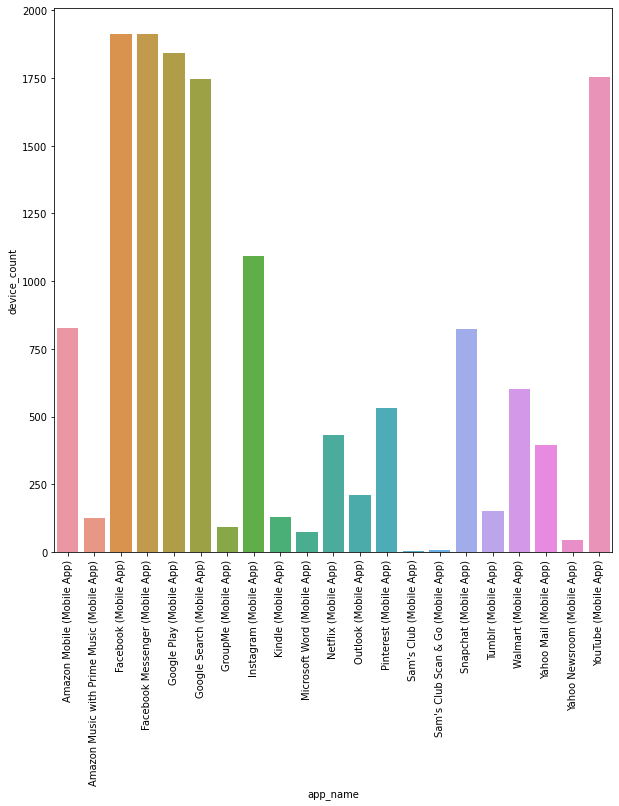

In [62]:
plt.figure(figsize=(10,10))
sns.barplot(data=df12,x='app_name',y='device_count')
plt.xticks(rotation=90)
plt.show()

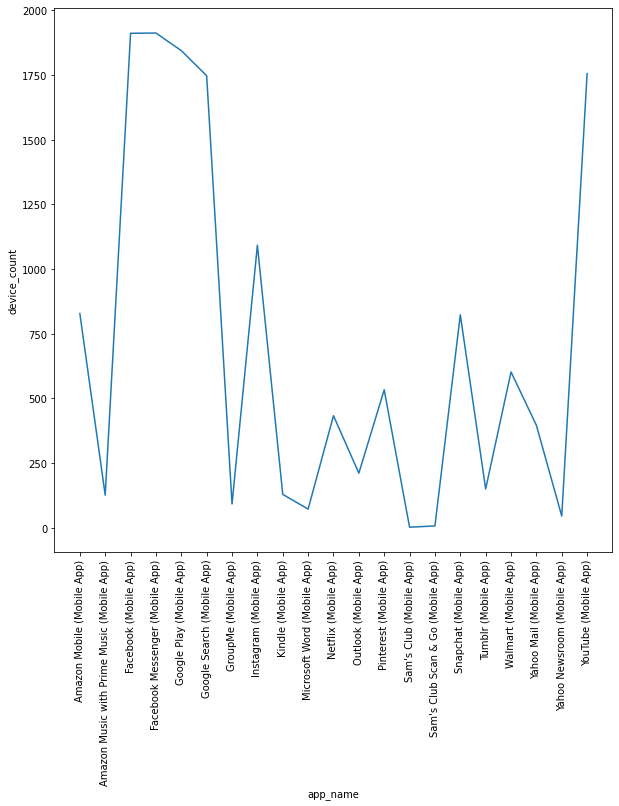

In [63]:
plt.figure(figsize=(10,10))
sns.lineplot(data=df12,x='app_name',y='device_count')
plt.xticks(rotation=90)
plt.show()

In [64]:
pdata = df12.groupby('app_name')['Avg_time_spent_per_device'].sum()
pdata

app_name
Amazon Mobile (Mobile App)                     119.505818
Amazon Music with Prime Music (Mobile App)     147.709200
Facebook (Mobile App)                         2420.186242
Facebook Messenger (Mobile App)               1396.553956
Google Play (Mobile App)                       127.655345
Google Search (Mobile App)                     345.808226
GroupMe (Mobile App)                           131.117517
Instagram (Mobile App)                         465.308740
Kindle (Mobile App)                            344.901265
Microsoft Word (Mobile App)                     50.132250
Netflix (Mobile App)                           457.859702
Outlook (Mobile App)                           195.718905
Pinterest (Mobile App)                         211.688475
Sam's Club (Mobile App)                         50.085000
Sam's Club Scan & Go (Mobile App)               42.487200
Snapchat (Mobile App)                          359.980882
Tumblr (Mobile App)                            537.850908
Walma

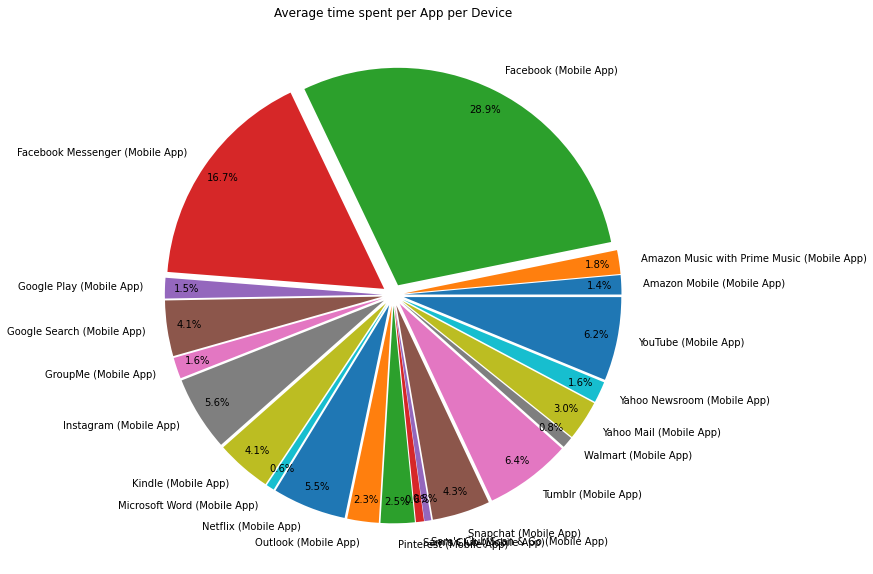

In [65]:
plt.figure(figsize=(12,10))
plt.title('Average time spent per App per Device')
plt.pie(pdata,labels=pdata.keys(),autopct="%.1f%%",pctdistance=0.9,explode=[0.05]*len(pdata))
plt.show()

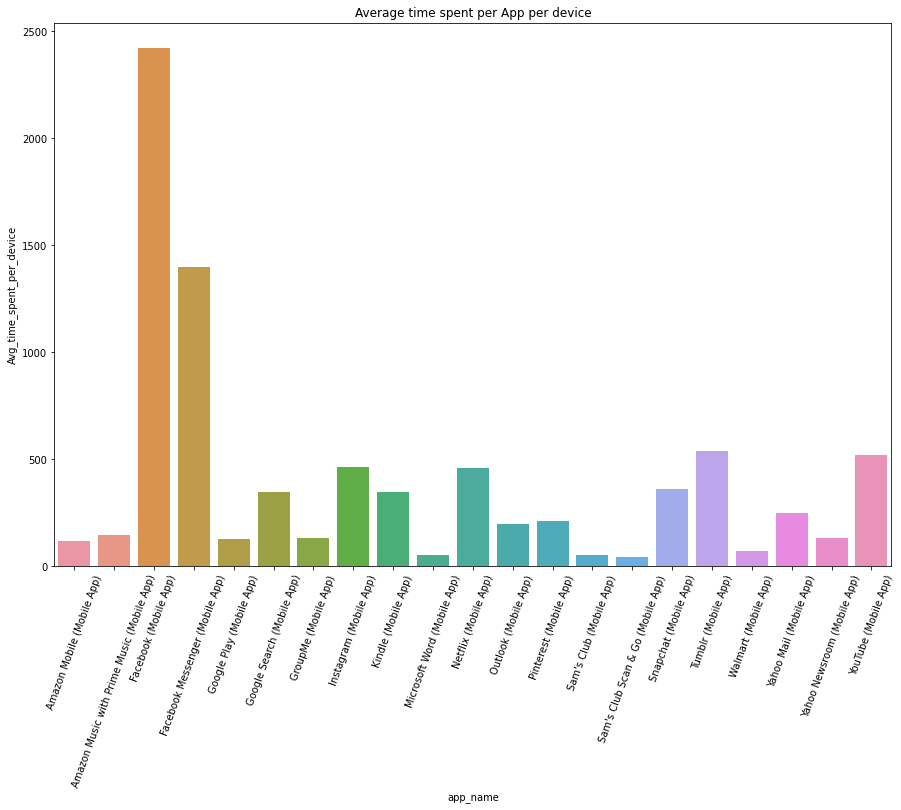

In [66]:
plt.figure(figsize=(15,10))
sns.barplot(data=df12,x='app_name',y='Avg_time_spent_per_device')
plt.title('Average time spent per App per device')
plt.xticks(rotation=70)
plt.show()

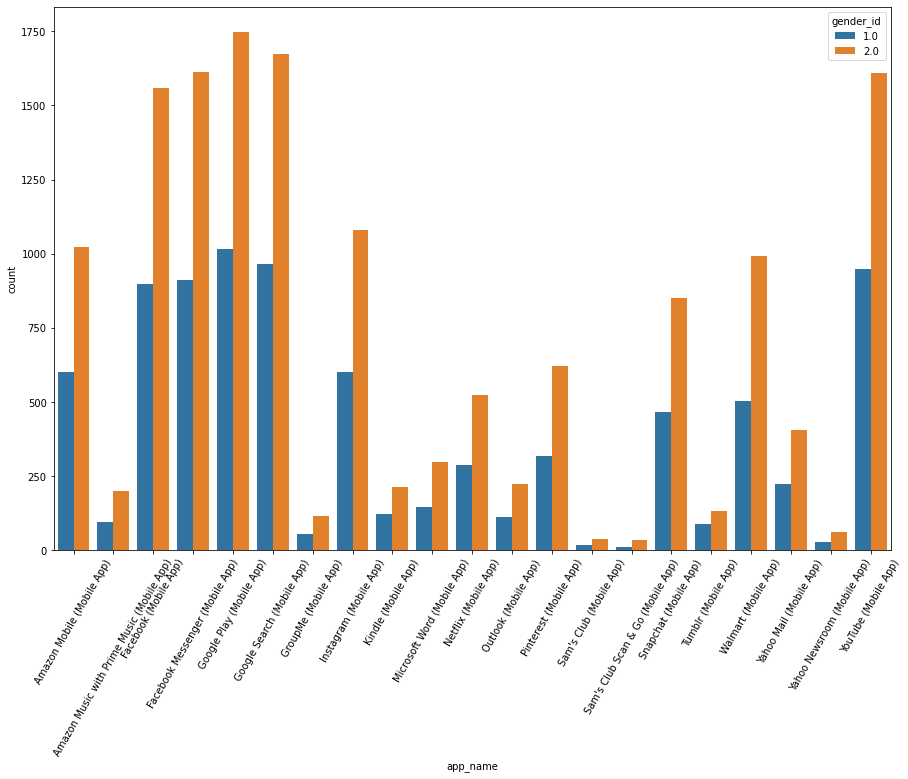

In [67]:
plt.figure(figsize=(15,10))
sns.countplot(data=df6,x='app_name',hue='gender_id')
plt.xticks(rotation=60)
plt.show()